<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas</a></span><ul class="toc-item"><li><span><a href="#Serie" data-toc-modified-id="Serie-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Serie</a></span></li><li><span><a href="#Visualizzione-grafica-di-una-serie" data-toc-modified-id="Visualizzione-grafica-di-una-serie-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizzione grafica di una serie</a></span></li><li><span><a href="#Operazioni-con-le-serie" data-toc-modified-id="Operazioni-con-le-serie-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Operazioni con le serie</a></span></li><li><span><a href="#Dataframe" data-toc-modified-id="Dataframe-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Dataframe</a></span></li></ul></li></ul></div>

<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Pandas.
</div>
<hr style="width: 90%;" align="left" />




<div id="h-0"></div>

# Pandas
Vedremo come la libreria pandas faciliti le operazioni viste finora per caricare dati, organizzarli in opportune strutture e analizzarli. Per poter procedere dobbiamo ricaricare le librerie usate finora, nonché il file `heroes.csv`. Useremo anche la _matplotlib magic_ che ci permette di visualizzare i grafici direttamente nel notebook.

In [65]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('data/heroes.csv', 'r') as heroes_file:
  heroes_reader = csv.reader(heroes_file, delimiter=';', quotechar='"')
  heroes = list(heroes_reader)[1:]


Va notato come pandas (così come, in generale, gran parte del software open source dedicato all'analisi dei dati) sia caratterizzato da una comunità di sviluppatori molto attiva. Ciò significa che il tempo tra il rilascio di due release successive sia di norma breve: se avete effettuato l'installazione in modo autonomo è quindi possibile che stiate utilizzando una versione più (o meno) recente di quella più aggiornata quando è stato scritto questo documento. Per verificare quale sia la versione installata è sufficiente accedere alla proprietà `pd.__version__`:

In [66]:
pd.__version__

'1.5.3'

Utilizzando una versione diversa da questa, può capitare che il risultato ottenuto eseguendo alcune celle sia diverso da quello indicato. Alcune funzionalità potrebbero anche non essere implementate, deprecate o perfino rimosse. Se state invece utilizzando l'ambiente fornito tramite immagine Docker o tramite mybinder non dovreste avere problemi di questo genere.




<div id="h-1"></div>

## Serie
Una delle classi principali implementate in pandas è `Series`. Le sue istanze rappresentano serie di osservazioni di un certo carattere fatto su un insieme di individui. La cella seguente recupera dalla lista `heroes` precedentemente creata i nomi dei supereroi e il loro anno di prima apparizione e li utilizza per creare una serie:

In [67]:
years = [int(h[7]) if h[7] else None for h in heroes]
names = [h[0] for h in heroes]
first_appearance = pd.Series(years, index = names)

Nella creazione della lista `year` è stata utilizzata una list comprehension in cui l'espressione `int(h[7]) if h[7] else None` utilizza un operatore ternario tramite cui la stringa vuota viene trasformata nel valore speciale `None`, mentre tutte le altre vengono convertite nel corrispondente intero.

La differenza tra una serie e una lista o una tupla è legata alla possibilità di invocare su di essa delle funzioni specifiche. Inoltre a ogni serie è associato un *indice* che permette di identificare ogni elemento osservato. Nell'esempio sopra riportato, il primo argomento specificato nel costruttore è una lista (ma sarebbe andata bene anche una tupla) di anni che indicano la prima apparizione di un supereroe e il secondo rappresenta appunto l'indice, che in questo caso è la lista dei corrispondenti nomi. Quando si visualizza una serie, ogni osservazione viene associata al corrispondente elemento usando appunto l'indice:

In [68]:
first_appearance

A-Bomb         2008.0
Abraxas           NaN
Abomination       NaN
Adam Monroe       NaN
Agent 13          NaN
                ...  
Alan Scott     1940.0
Amazo          1960.0
Ant-Man        1962.0
Ajax           1998.0
Alex Mercer       NaN
Length: 735, dtype: float64

La visualizzazione della serie (che in questo caso riporta solo i primi e gli ultimi elementi perché la serie è troppo lunga) termina indicando il tipo di dato usato per rappresentare le varie osservazioni. Nell'esempio precedente viene utilizzato il tipo `float64` (pandas utilizza internamente gli array di numpy, in cui è presente un'implementazione dei tipi in virgola mobile diversa da quella standard di python), nonostante i dati originari fossero numeri interi. Ciò è dovuto alla presenza di valori mancanti. Di norma vengono indicati con la sigla NA (dall'inglese "not available"), ma in pandas essi vengono rappresentati utilizzando il concetto di "not a number" dello standard IEEE per la virgola mobile: si noti come tutte le occorrenze di `None` nella lista originale siano state automaticamente convertite in `np.nan`.

L'accesso ai dati contenuti in una serie può avvenire in due modi:
- specificando un valore per l'indice tra parentesi quadre dopo la serie o dopo la sua proprietà `loc`:

In [69]:
(first_appearance['Wonder Woman'], first_appearance.loc['Wonder Woman'])

(1941.0, 1941.0)

- indicando un valore per la posizione tra parentesi quadre dopo la serie o dopo la sua proprietà `iloc`:

In [70]:
(first_appearance[128], first_appearance.iloc[128])

(1992.0, 1992.0)

<div class="alert alert-warning">
Se l'indice di una serie è basato su valori interi, i valori tra parentesi quadre immediatamente dopo la serie faranno riferimento all'indice e non alla posizione: ciò potrebbe essere fuorviante se gli elementi dell'indice non partono da zero e non sono consecutivi.
</div>

È inoltre possibile utilizzare una notazione simile al _list slicing_ specificando valori dell'indice oppure posizioni. Va però notato che gli _slicing_ basati su indice comprenderanno il primo e l'ultimo valore specificato:

In [71]:
first_appearance['Wonder Girl':'Wonder Woman']

Wonder Girl     1996.0
Wonder Woman    1941.0
dtype: float64

mentre gli _slice_ basati su posizione escluderanno l'ultimo elemento:

In [72]:
first_appearance[60:63]

Vegeta         NaN
Vixen       1981.0
Valkyrie       NaN
dtype: float64

L'accesso posizionale può anche fare riferimento a numeri negativi, contando in analogia a liste e tuple a partire dall'ultimo elemento:

In [73]:
first_appearance[-5:]

Alan Scott     1940.0
Amazo          1960.0
Ant-Man        1962.0
Ajax           1998.0
Alex Mercer       NaN
dtype: float64

È possibile accedere ai primi e ultimi elementi di una serie anche utilizzando le funzioni `head` e `tail`, che mostrano rispettivamente solo le prime e le ultime righe:

In [74]:
first_appearance.head(7)

A-Bomb         2008.0
Abraxas           NaN
Abomination       NaN
Adam Monroe       NaN
Agent 13          NaN
Air-Walker        NaN
Agent Bob      2007.0
dtype: float64

L'accesso alle liste può anche essere fatto specificando una lista (ma non una tupla) di posizioni al posto di una sola posizione, con l'effetto di ottenere i corrispondenti elementi.

In [75]:
first_appearance[[1, 42, 709]]

Abraxas     NaN
Warbird     NaN
Astro Boy   NaN
dtype: float64

Questo tipo di accesso può essere fatto anche specificando una lista di valori per l'indice. Infine, si può utilizzare una lista di valori booleani in cui `True` indica gli elementi da estrarre e `False` quelli da filtrare:

In [76]:
print(first_appearance[[1970 <= y <1975 for y in first_appearance]])
#senza comprehension (tipo query)
first_appearance[(first_appearance >= 1970) & (first_appearance < 1975)]

Thundra               1972.0
Swamp Thing           1972.0
Shang-Chi             1973.0
Rambo                 1972.0
Ra's Al Ghul          1971.0
Namorita              1972.0
Mockingbird           1971.0
Metron                1971.0
Man-Bat               1970.0
Man-Thing             1971.0
Luke Cage             1972.0
Jennifer Kale         1972.0
Iron Fist             1974.0
Ghost Rider           1972.0
Etrigan               1972.0
Drax the Destroyer    1973.0
Diamondback           1972.0
Doc Samson            1971.0
Darkseid              1970.0
Deathlok              1974.0
Brother Voodoo        1973.0
Blade                 1973.0
dtype: float64


Thundra               1972.0
Swamp Thing           1972.0
Shang-Chi             1973.0
Rambo                 1972.0
Ra's Al Ghul          1971.0
Namorita              1972.0
Mockingbird           1971.0
Metron                1971.0
Man-Bat               1970.0
Man-Thing             1971.0
Luke Cage             1972.0
Jennifer Kale         1972.0
Iron Fist             1974.0
Ghost Rider           1972.0
Etrigan               1972.0
Drax the Destroyer    1973.0
Diamondback           1972.0
Doc Samson            1971.0
Darkseid              1970.0
Deathlok              1974.0
Brother Voodoo        1973.0
Blade                 1973.0
dtype: float64

<div class="alert alert-warning">
L'uso di questa modalità di accesso richiede che la lista di valori booleani abbia la stessa lunghezza della serie. L'uso di liste di dimensioni minori l'accesso, che comporta un filtraggio effettuato solo nei primi elementi della serie, è deprecato e va quindi evitato.  
</div>

Infine, è possibile effettuare delle _query_ su una serie specificando tra parentesi quadre un'espressione logica che indica quali elementi visualizzare, utilizzando la serie come simbolo che ne indica un suo generico elemento:

In [77]:
first_appearance > 2010

A-Bomb         False
Abraxas        False
Abomination    False
Adam Monroe    False
Agent 13       False
               ...  
Alan Scott     False
Amazo          False
Ant-Man        False
Ajax           False
Alex Mercer    False
Length: 735, dtype: bool

In [78]:
first_appearance[first_appearance > 2010] # internamente viene creata una lista di boolean, verranno presi solo gli elementi True

Venompool        2011.0
The Cape         2011.0
Spider-Man       2011.0
Simon Baz        2012.0
Rey              2015.0
Kylo Ren         2015.0
Jyn Erso         2016.0
K-2SO            2016.0
Jessica Cruz     2013.0
Garbage Man      2011.0
Evil Deadpool    2011.0
Captain Cold     2012.0
Bloodhawk        2099.0
dtype: float64

<div class="alert alert-info">
Tecnicamente, l'espressione `first_appearance > 2010` genera una nuova serie che ha lo stesso indice di `first_appearance` e in cui i valori sono `True` in corrispondenza degli anni successivi al 2010 e `False` altrimenti. Questa nuova serie viene utilizzata per filtrare `first_appearance`.
</div>

Vediamo ora come utilizzando le serie sia molto più semplice calcolare e visualizzare le frequenze assolute: il metodo `value_counts` restituisce un'altra serie in cui gli indici sono i valori osservati e i valori le corrispondenti frequenze assolute, ordinate in senso non crescente.

In [79]:
first_appearance.value_counts()

1964.0    18
1963.0    18
1965.0    14
2004.0    11
1975.0    10
          ..
2013.0     1
1983.0     1
1933.0     1
1948.0     1
1988.0     1
Length: 71, dtype: int64

Va notato come il tipo delle frequenze sia, correttamente, intero e come i valori mancanti siano automaticamente esclusi dal calcolo delle frequenze, mentre sono sempre presenti gli _outlier_.  Per ottenere una serie i cui elementi siano ordinati per valore non decrescente della voce nell'indice è sufficiente invocare il metodo `sort_index`; già che ci siamo, è un buon momento per eliminare i valori fuori scala dal conteggio effettuando una _query_ sulla serie:

In [80]:
first_app_freq = first_appearance[first_appearance < 2090].value_counts().sort_index()
first_app_freq.head(10)

1933.0    1
1939.0    1
1940.0    9
1941.0    7
1943.0    2
1944.0    2
1945.0    1
1947.0    2
1948.0    1
1950.0    1
dtype: int64




<div id="h-2"></div>

## Visualizzazione grafica di una serie
Pandas mette a disposizione l'oggetto `plot` per visualizzare graficamente i contenuti di una serie, utilizzando matplotlib dietro le quinte; in particolare, il metodo `bar` visualizza un grafico a barre:

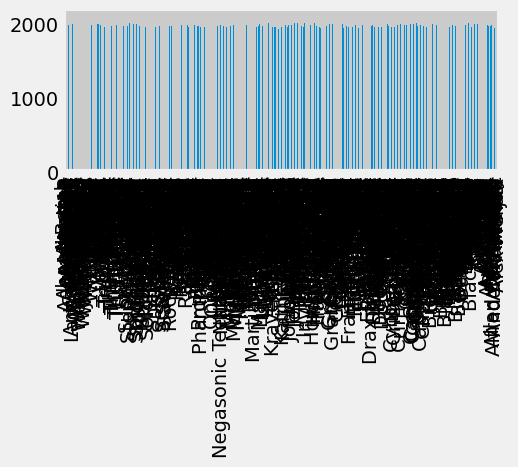

In [81]:
# Don't try this at home (men che meno all'esame!)

first_appearance.plot.bar()
plt.show()

Il grafico ottenuto, diciamolo, fa schifo. Questo perché `bar` considera un punto per ogni elemento della serie, in cui le ascisse corrispondono alla posizione (zero per la prima osservazione, uno per la seconda e così via, sebbene nel grafico sull'asse delle ascisse vengano poi visualizzati i valori dell'indice) e le ordinate al valore osservato. Per ognuno dei punti così ottenuti viene poi tracciato un segmento che lo congiunge perpendicolarmente all'asse delle ascisse. Il risultato è decisamente poco informativo, sia da un punto di vista grafico (le etichette sull'asse delle ascisse si sovrappongono, così che non si riesce a leggere nulla), sia da un punto di vista analitico: le barre hanno altezze simili e quindi le loro differenze sono poco apprezzabili a colpo d'occhio; inoltre il grafico dipende per esempio dall'ordine in cui sono elencate le osservazioni e non ci permette di solito di trarre alcuna informazione sulla relazione che lega tra loro le osservazioni.

Si ottengono dei risultati decisamente più interessanti se si visualizza un grafico analogo per le frequenze assolute:

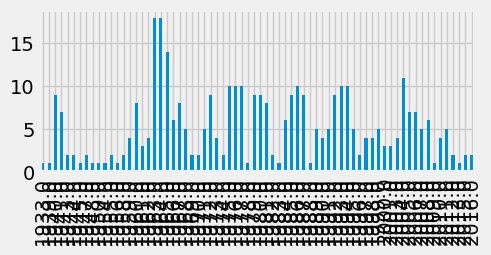

In [82]:
first_app_freq.plot.bar()
plt.show()

Il grafico ottenuto è sicuramente migliore di quello precedente, ma rimane il problema di leggibilità dell'asse delle ascisse. Ciò è dovuto al fatto che pandas non inserisce le barre sul grafico nelle ascisse corrispondenti agli anni, ma le posiziona una accanto all'altra, come possiamo renderci conto visualizzando un po' meglio solo alcune delle etichette (in prima istanza non è importante capire come venga generato questo grafico, ma se siete cursori potete leggere l'approfondimento che trovate dopo il commento al grafico stesso):

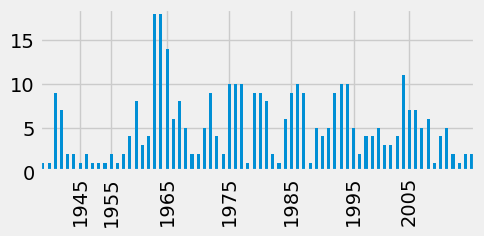

In [83]:
years = np.arange(1945, 2010, 10)
index_pos = [first_app_freq.index.get_loc(y) for y in years]
first_app_freq.plot.bar()
plt.xticks(index_pos, years)
plt.ylim((0, 18.5))
plt.show()

Si può osservare che tra due valori successivi evidenziati nell'asse delle ascisse intercorre una distanza di dieci anni, ma le etichette non risultano equispaziate: ciò è dovuto al fatto che in realtà la prima barra ha ascissa 1, la seconda ha ascissa 2 e così via, mentre le etichette mostrate sull'asse delle ascisse corrispondono ai valori degli indici.

<div class="alert alert-info">
Per generare il grafico precedente è necessario utilizzare alcune funzionalità avanzate delle librerie considerate: `np.arange` permette di costruire un array i cui valori vanno di dieci in dieci partendo da 1945 e arrivando a 2005; la proprietà `index` di una serie permette di estrarne l'indice e il metodo `get_loc` di quest'ultimo restituisce la posizione corrispondente a un dato valore dell'indice. Infine, il metodo `xticks` di matplotlib permette di specificare quali valori evidenziare sull'asse delle ascisse e quali etichette utilizzare.
</div>

Per ottenere un grafico simile in cui le ascisse siano effettivamente gli anni di prima apparizione è necessario tornare a utilizzare esplicitamente matplotlib, passando al metodo `bar` rispettivamente l'indice e i valori della serie, che si ottengono rispettivamente utilizzando la proprietà `index` e invocando il metodo `get_values`.

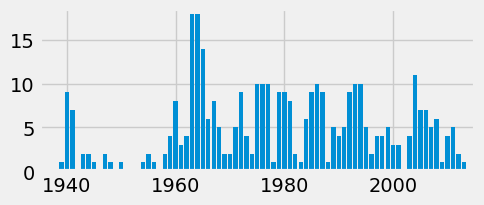

In [84]:
plt.bar(first_app_freq.index, first_app_freq.values)
plt.xlim((1935, 2015))
plt.ylim(0, 18.5)
plt.show()




<div id="h-3"></div>

## Operazioni con le serie
Consideriamo le seguenti domande:

1. Quanti supereroi sono apparsi a partire dal 1960?
2. Quanti tra il 1940 e il 1965?
3. Quanti prima del 1970?

Per rispondere alla prima domanda dobbiamo isolare le frequenze che corrispondono agli anni di apparizione che vanno dal 1960 in avanti. Notiamo che l'indice della serie contiene i valori degli anni; è quindi possibile utilizzare l'accesso tramite *list slicing* per recuperare le frequenze degli anni di apparizione che vanno dal 1960 in avanti:

In [85]:
first_app_freq[1960:]

1960.0     8
1961.0     3
1962.0     4
1963.0    18
1964.0    18
1965.0    14
1966.0     6
1967.0     8
1968.0     5
1969.0     2
1970.0     2
1971.0     5
1972.0     9
1973.0     4
1974.0     2
1975.0    10
1976.0    10
1977.0    10
1978.0     1
1979.0     9
1980.0     9
1981.0     8
1982.0     2
1983.0     1
1984.0     6
1985.0     9
1986.0    10
1987.0     9
1988.0     1
1989.0     5
1990.0     4
1991.0     5
1992.0     9
1993.0    10
1994.0    10
1995.0     5
1996.0     2
1997.0     4
1998.0     4
1999.0     5
2000.0     3
2001.0     3
2003.0     4
2004.0    11
2005.0     7
2006.0     7
2007.0     5
2008.0     6
2009.0     1
2010.0     4
2011.0     5
2012.0     2
2013.0     1
2015.0     2
2016.0     2
dtype: int64

A questo punto è sufficiente invocare la funzione `sum` sulla sotto-serie individuata per ottenere la somma delle frequenze:

In [86]:
sum(first_app_freq[1960:])

329

La seconda domanda trova risposta in modo analogo, filtrando le frequenze degli anni di apparizione tra il 1940 e il 1966:

In [87]:
sum(first_app_freq[1940:1966])

106

Analogamente, all'ultima domanda si risponde selezionando gli anni fino al 1969:

In [88]:
sum(first_app_freq[:1970])

125

<div class="alert alert-info">
La funzione `sum` accetta come argomento liste, tuple e serie: in tutti i casi restituisce la somma dei valori in esse contenute.
</div>

Un modo alternativo per calcolare la somma dei valori in una serie è quella di invocare su di essa l'omonimo metodo `sum`. Le serie sono inoltre in tutto e per tutto dei vettori, sui quali è possibile effettuare operazioni algebriche. Consideriamo per esempio le due serie contenenti altezza e peso dei supereroi:

In [89]:
height = pd.Series([float(h[4]) if h[4] else None for h in heroes], index=names)
weight = pd.Series([float(h[5]) if h[5] else None for h in heroes], index=names)

Una prima categoria di operazioni è quella che si ottiene indicando il nome di una serie all'interno di un'espressione aritmetica: il risultato è una nuova serie ottenuta calcolando l'espressione su tutti gli elementi della serie di partenza. Per esempio, la cella seguente crea la serie contenente l'altezza degli eroi misurata in metri e ne visualizza i primi dieci elementi:

In [90]:
(height/100)[:10]

A-Bomb         2.0321
Abraxas           NaN
Abomination    2.0304
Adam Monroe       NaN
Agent 13       1.7341
Air-Walker     1.8859
Agent Bob      1.7825
Abe Sapien     1.9124
Abin Sur       1.8552
Angela            NaN
dtype: float64

Quando si considerano operazioni più complicate, è possibile utilizzare il metodo `apply` indicando come suo argomento la funzione da applicare agli elementi della serie. Per esempio, nella cella seguente viene creata una nuova serie ottenuta esprimendo le altezze dei supereroi in metri e successivamente elevando il risultato al quadrato.

In [91]:
height.apply(lambda h: (h/100)**2)[:10]

A-Bomb         4.129430
Abraxas             NaN
Abomination    4.122524
Adam Monroe         NaN
Agent 13       3.007103
Air-Walker     3.556619
Agent Bob      3.177306
Abe Sapien     3.657274
Abin Sur       3.441767
Angela              NaN
dtype: float64

Un'altra importante categoria di operazioni è quella che vede due serie indicate come argomenti di un operatore aritmetico binario. In questo caso verrà ancora creata una nuova serie, in cui l'operazione viene calcolata elemento per elemento nelle serie indicate. Per esempio, la cella seguente crea una nuova serie `bmi` contenente l'indice di massa corporea (BMI) dei supereroi (ottenuto dividendo il peso specificato in chilogrammi per il quadrato dell'altezza misurata in metri), e mostra i quindici supereroi con il BMI più elevato.

In [92]:
bmi = weight / height.apply(lambda h: (h/100)**2)
bmi.sort_values(ascending=False)[:15]

Utgard-Loki     2501.321629
Giganta         1607.124545
Red Hulk         137.611973
Darkseid         114.366701
Machine Man      114.083519
Thanos           109.414534
Destroyer        107.579152
Abomination      107.211015
A-Bomb           107.024446
Hulk             105.622909
Bloodaxe         104.160435
Juggernaut       103.216295
King Kong        102.732873
Sasquatch         96.810738
Living Brain      91.318046
dtype: float64

A parte notare Hulk è solo il quindicesimo della classifica, va sottolineato che le operazioni fatte elemento per elemento allineano i vettori corrispondenti alle serie in base all'indice (e non alla posizione). Consideriamo per esempio la seguente cella, in cui vengono selezionati altezze e pesi più o meno plausibili per un essere umano, calcolando poi i corrispondenti BMI.

In [93]:
standard_weight = weight[(weight < 100) & (weight > 40)]
standard_height = height[(height < 210) & (height > 120)]/100
(standard_weight / (standard_height**2))[:15]

A-Bomb                     NaN
Abe Sapien           17.868501
Abin Sur             26.410852
Abomination                NaN
Absorbing Man              NaN
Adam Strange         25.952943
Agent 13             20.295282
Agent Bob            25.634923
Agent Zero                 NaN
Air-Walker                 NaN
Ajax                 24.245355
Alan Scott           27.725061
Alfred Pennyworth    22.966566
Ammo                       NaN
Angel                20.589542
dtype: float64

Si nota un numero relativamente elevato di `NaN`, e ciò è appunto dovuto al fatto che il rapporto alla base del calcolo del BMI viene fatto usando peso e altezza di valori che hanno lo stesso indice. Ora, non è detto che un supereroe che ha un peso plausibile abbia anche un'altezza plausibile, e viceversa. Quello che succede quando si esegue un'operazione tra due serie e solo una di essa è definita in corrispondenza di uno specifico valore dell'indice, il risultato conterrà `NaN` per quel valore.




<div id="h-4"></div>

## Dataframe
Un _dataframe_ è una collezione di serie che hanno lo stesso indice, ed è quindi un insieme di osservazioni di vari _caratteri_ per una popolazione di individui. Tra i vari modi che sono disponibili in pandas per creare un _dataframe_, noi faremo riferimento al metodo `read_csv` della classe `pd.DataFrame`, che permette di leggere i contenuti di un file in formato CSV e convertirli automaticamente in un _dataframe_.

In [94]:
heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)

Usando lo stesso file a cui abbiamo fatto riferimento nei paragrafi precedenti, è stato necessario utilizzare l'argomento opzionale `sep` per indicare il carattere usato per separare i campi in ogni record. La visualizzazione dei dataframe viene automaticamente formattata in un formato tabellare facile da leggere se si utilizza jupyter:

In [95]:
heroes

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Abraxas,Abraxas,Within Eternity,Marvel Comics,NaN,NaN,M,NaN,Blue,Black,100.0,high
Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Marvel Comics,203.04,441.98,M,NaN,Green,No Hair,80.0,good
Adam Monroe,NaN,NaN,NBC - Heroes,NaN,NaN,M,NaN,Blue,Blond,10.0,good
Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Alan Scott,Alan Ladd Wellington Scott,Gotham City,DC Comics,180.98,90.81,M,1940.0,Blue,Blond,80.0,good
Amazo,NaN,NaN,DC Comics,257.49,173.95,M,1960.0,Red,NaN,100.0,good
Ant-Man,Hank Pym,"Elmsford, New York",Marvel Comics,211.74,122.44,M,1962.0,Blue,Blond,20.0,high


Ci riferiremo spesso alle righe e alle colonne di un _dataframe_ per indicare rispettivamente le osservazioni e i caratteri. Per esempio la prima riga si riferisce all'osservazione relativa ad "A-Bomb", mentre la prima colonna corrisponde al carattere "identity". Vi sono molti modi per interagire con un _dataframe_:

- l'insieme degli indici, dei caratteri e dei valori si ottengono, nell'ordine, alle proprietà `index`, `columns` e `values`;
- una serie corrispondente a una colonna/carattere può essere selezionata usando una sintassi simile a quella dei dizionari, specificando il nome del carattere come chiave:

In [96]:
heroes['Gender']

Name
A-Bomb         M
Abraxas        M
Abomination    M
Adam Monroe    M
Agent 13       F
              ..
Alan Scott     M
Amazo          M
Ant-Man        M
Ajax           M
Alex Mercer    M
Name: Gender, Length: 735, dtype: object

<div class="alert alert-info">
In alternativa è possibile usare una sintassi basata su _dot notation_ in cui il nome della colonna, senza essere racchiuso tra apici, segue il _dataframe_. In altre parole, `heroes['Gender']` e `heroes.Gender` sono equivalenti. Questa seconda notazione è però utilizzabile solamente se non vi sono spazi nei nomi delle colonne. Nel seguito utilizzeremo quindi sempre la prima delle due notazioni.
</div>

- tramite uno _slicing_ sulle posizioni o sui valori dell'indice è possibile selezionare un sottoinsieme delle righe del _dataframe_ (e come nel caso delle serie, l'estremo superiore è incluse se si usano gli indici ed escluso se si usano le posizioni):

In [97]:
heroes['Agent 13':'Air-Walker']

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN
Air-Walker,Gabriel Lan,"Xandar, a planet in the Tranta system, Androme...",Marvel Comics,188.59,108.23,M,NaN,Blue,White,85.0,average


Queste modalità di accesso possono effettivamente creare confusione: usando una sintassi molto simile, specificando un valore si accede a una colonna e specificando uno _slice_ si accede a un insieme di righe. Per scrivere codice più chiaro è meglio selezionare le righe utilizzando le proprietà `loc` e `iloc` nello stesso modo in cui queste funzionano per le serie, con la differenza che quando queste sono usate specificando un solo valore, viene restituita una serie, e quando sono utilizzate con uno _slice_ o con una lista viene restituito un _dataframe_.

In [98]:
heroes.iloc[1]

Identity                     Abraxas
Birth place         Within Eternity 
Publisher              Marvel Comics
Height                           NaN
Weight                           NaN
Gender                             M
First appearance                 NaN
Eye color                       Blue
Hair color                     Black
Strength                       100.0
Intelligence                    high
Name: Abraxas, dtype: object

In [99]:
heroes.loc['Professor X']

Identity            Charles Francis Xavier
Birth place             New York, New York
Publisher                    Marvel Comics
Height                              183.74
Weight                               86.89
Gender                                   M
First appearance                    1963.0
Eye color                             Blue
Hair color                         No Hair
Strength                              10.0
Intelligence                          high
Name: Professor X, dtype: object

In [100]:
heroes.iloc[42:46]

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Warbird,Carol Danvers,"Boston, Massachusetts",Marvel Comics,180.56,54.75,F,NaN,Blue,Blond,NaN,NaN
Wildfire,Drake Burroughs,NaN,DC Comics,NaN,NaN,M,NaN,NaN,NaN,35.0,average
Vulture,Adrian Toomes,"Staten Island, New York City",Marvel Comics,180.61,79.63,M,NaN,Brown,No Hair,25.0,good
Warp,Emil LaSalle,NaN,DC Comics,173.42,67.42,M,1981.0,Brown,Black,10.0,moderate


È inoltre possibile selezionare una o più righe e visualizzare solo un sottoinsieme dei caratteri, passando a `loc` o `iloc` un secondo argomento in cui si specificano i caratteri da mostrare, utilizzando anche in questo caso un valore, una lista di valori oppure uno _slice_:

In [101]:
heroes.loc['Professor X', 'Height':'Gender']

Height    183.74
Weight     86.89
Gender         M
Name: Professor X, dtype: object

Va notato che `loc` accetta solo valori simbolici, mentre `iloc` solamente posizioni, e ciò riguarda anche il loro secondo argomento:

In [102]:
heroes.iloc[[106, 103], [3, 4]]

,Height,Weight
Name,,
Tempest,163.02,54.36
Supergirl,165.40,54.80


Volendo accedere direttamente a un elemento è possibile utilizzare le proprietà `at` e `iat`:

In [103]:
heroes.at['Superman', 'Strength']

100.0

In [104]:
heroes.iat[500, -1]

'high'

In [105]:
heroes.iloc[[500], [-1]]

,Intelligence
Name,
Faora,high


<div class="alert alert-info">
È anche possibile utilizzare `loc` e `iloc` per estrarre un singolo elemento: per esempio, `heroes.loc['Superman', 'Strength']` equivale alla prima delle due istruzioni appena elencate. Tuttavia, `at` e `iat` sono implementate in modo da essere più efficienti.
</div>

È infine possibile riordinare le righe di un dataframe invocando i metodi `sort_values` e `sort_index`: il primo basa l'ordinamento sul valore di una colonna, il cui nome va specificato tramite l'argomento `by` e il secondo è invece basato sui valori dell'indice. È inoltre possibile indicare un valore booleano per l'argomento `ascending` che permette di ordinare in verso crescente o decrescente.

In [106]:
heroes.sort_values(by='Weight', ascending=False)[:5]

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Sasquatch,Walter Langkowski,"Edmonton, Alberta, Canada",Marvel Comics,305.02,900.70,M,NaN,Red,Orange,80.0,good
Juggernaut,Cain Marko,"Berkeley, California",Marvel Comics,287.95,855.82,M,1965.0,Blue,Red,100.0,average
Darkseid,Uxas,NaN,DC Comics,267.37,817.57,M,1970.0,Red,No Hair,100.0,high
Hulk,Bruce Banner,"Dayton, Ohio",Marvel Comics,244.40,630.90,M,1962.0,Green,Green,100.0,high
Giganta,Doris Zuel,NaN,DC Comics,62.65,630.80,F,1944.0,Green,Red,90.0,high


In [107]:
heroes.sort_index()[-5:]

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Yellowjacket II,Rita DeMara,NaN,Marvel Comics,165.58,52.36,F,NaN,Blue,Strawberry Blond,10.0,average
Ymir,Ymir,Niffleheim,Marvel Comics,304.63,NaN,M,NaN,White,No Hair,100.0,average
Yoda,Yoda,NaN,George Lucas,66.29,17.01,M,1980.0,Brown,White,55.0,high
Zatanna,Zatanna Zatara,NaN,DC Comics,170.29,57.77,F,NaN,Blue,Black,10.0,high
Zoom,Hunter Zolomon,NaN,DC Comics,185.90,81.93,M,NaN,Red,Brown,10.0,average


Va notato che entrambi i metodi restituiscono una copia del _dataframe_. Anche per i _dataframe_ è possibile utilizzare una lista di valori booleani che identificano le righe da selezionare, e tale lista può essere prodotta effettuando una query. In questo caso però le condizioni possono riguardare le varie colonne, ognuna delle quali va specificata usando una delle due sintassi precedentemente introdotte (quella analoga ai dizionari oppure quella basata su _dot notation_). Per esempio possiamo selezionare gli eroi per cui l'anno di apparizione esiste e rappresenta un valore non fuori scala nel modo seguente:

In [108]:
heroes_with_year = heroes[heroes['First appearance'] > 1900]
heroes_with_year.head()

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Agent Bob,Bob,NaN,Marvel Comics,178.25,81.45,M,2007.0,Brown,Brown,10.0,low
Abe Sapien,Abraham Sapien,NaN,Dark Horse Comics,191.24,65.35,M,1993.0,Blue,No Hair,30.0,high
Abin Sur,NaN,Ungara,DC Comics,185.52,90.90,M,1959.0,Blue,No Hair,90.0,average
Animal Man,Bernhard Baker,NaN,DC Comics,183.80,83.39,M,1965.0,Blue,Blond,50.0,average


In [109]:
h_e = heroes[(heroes['First appearance'] > 1900) & \
             (heroes['Eye color'] == 'Blue')]
# senza tonde non viene esplicitato l'ordine di valutazione degli operatori (in questo caso senza tonde la priorità viene
# data agli operatori bit a bit), Verrebbe valutato 1900 e un colore.
h_e

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Abe Sapien,Abraham Sapien,NaN,Dark Horse Comics,191.24,65.35,M,1993.0,Blue,No Hair,30.0,high
Abin Sur,NaN,Ungara,DC Comics,185.52,90.90,M,1959.0,Blue,No Hair,90.0,average
Animal Man,Bernhard Baker,NaN,DC Comics,183.80,83.39,M,1965.0,Blue,Blond,50.0,average
Absorbing Man,Carl Creel,"New York City, New York",Marvel Comics,193.36,122.28,M,1964.0,Blue,No Hair,80.0,moderate
X-Man,Nate Grey,American Northeast of Earth-295,Marvel Comics,175.82,61.80,M,1995.0,Blue,Brown,55.0,high
...,...,...,...,...,...,...,...,...,...,...,...
Ant-Man II,Scott Lang,"Coral Gables, Florida",Marvel Comics,183.67,86.28,M,1979.0,Blue,Blond,20.0,good
Angel,Warren Kenneth Worthington III,"Centerport, Long Island, New York",Marvel Comics,183.05,68.99,M,1969.0,Blue,Blond,15.0,good
Alfred Pennyworth,Alfred Thaddeus Crane Pennyworth,NaN,DC Comics,178.26,72.98,M,1943.0,Blue,Black,10.0,good


<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Pandas, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>